In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily, Stations
import pandas as pd

In [2]:
cologne = Point(50.9375, 6.9603, 53)

In [3]:
cologne.get_stations()

,name,country,region,wmo,icao,latitude,longitude,elevation,timezone,hourly_start,hourly_end,daily_start,daily_end,monthly_start,monthly_end,distance,score
id,,,,,,,,,,,,,,,,,
D2968,Köln-Stammheim,DE,NW,<NA>,<NA>,50.9894,6.9777,43.0,Europe/Berlin,1951-01-01,2023-04-15,1945-01-01,2023-04-15,1945-01-01,2022-01-01,5898.264867,0.887458
10513,Köln-Bonn Airport,DE,NW,10513,EDDK,50.8667,7.1667,91.0,Europe/Berlin,1931-01-01,2023-04-17,1931-01-01,2023-04-15,1931-01-01,2022-01-01,16476.260952,0.674121
D1024,Dormagen-Zons,DE,NW,<NA>,<NA>,51.1157,6.8510,37.0,Europe/Berlin,2006-08-01,2023-04-15,2006-08-02,2022-04-25,2006-01-01,2022-01-01,21238.269087,0.617630
10505,Bonn-Hangelar,DE,NRW,10505,<NA>,50.7667,7.1667,60.0,Europe/Berlin,2018-01-27,2023-04-17,2011-04-01,2023-02-28,2011-01-01,2022-01-01,23888.035821,0.582491


# Cologne Stammheim

In [4]:
stations = Stations()
stations = stations.nearby(50.9894, 6.977)
station_stammheim = stations.fetch(1)

In [5]:
station_stammheim

,name,country,region,wmo,icao,latitude,longitude,elevation,timezone,hourly_start,hourly_end,daily_start,daily_end,monthly_start,monthly_end,distance
id,,,,,,,,,,,,,,,,
D2968,Köln-Stammheim,DE,NW,<NA>,<NA>,50.9894,6.9777,43.0,Europe/Berlin,1951-01-01,2023-04-15,1945-01-01,2023-04-15,1945-01-01,2022-01-01,48.995254


# Cologne Airport

In [6]:
stations = Stations()
stations = stations.nearby(50.8667, 7.1667)
station_airport = stations.fetch(1)

In [7]:
station_airport

,name,country,region,wmo,icao,latitude,longitude,elevation,timezone,hourly_start,hourly_end,daily_start,daily_end,monthly_start,monthly_end,distance
id,,,,,,,,,,,,,,,,
10513,Köln-Bonn Airport,DE,NW,10513,EDDK,50.8667,7.1667,91.0,Europe/Berlin,1931-01-01,2023-04-17,1931-01-01,2023-04-15,1931-01-01,2022-01-01,0.0


# Daily Data 2023

In [8]:
start = datetime(2023, 1, 1)
end = datetime.now()
print('Current date: {}'.format(end))
data_airport = Daily(station_airport, start, end)
data_airport = data_airport.fetch()
data_stammheim = Daily(station_stammheim, start, end)
data_stammheim = data_stammheim.fetch()
df_concat = pd.concat((data_airport, data_stammheim))
by_row_index = df_concat.groupby(df_concat.index)
df_means = by_row_index.mean()
df_means.head()

Current date: 2023-04-20 07:13:10.757139


,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2023-01-01,13.60,10.95,15.65,3.45,NaN,182.5,17.15,37.1,1015.25,0.0
2023-01-02,11.35,7.05,14.90,3.60,NaN,213.0,14.50,41.4,1017.50,0.0
2023-01-03,7.85,4.50,11.65,2.00,NaN,190.0,12.40,33.5,1027.15,190.0
2023-01-04,11.00,7.65,13.40,2.85,NaN,215.0,22.80,52.9,1018.65,0.0
2023-01-05,10.75,9.35,12.45,3.00,NaN,251.0,16.95,47.5,1020.00,24.0


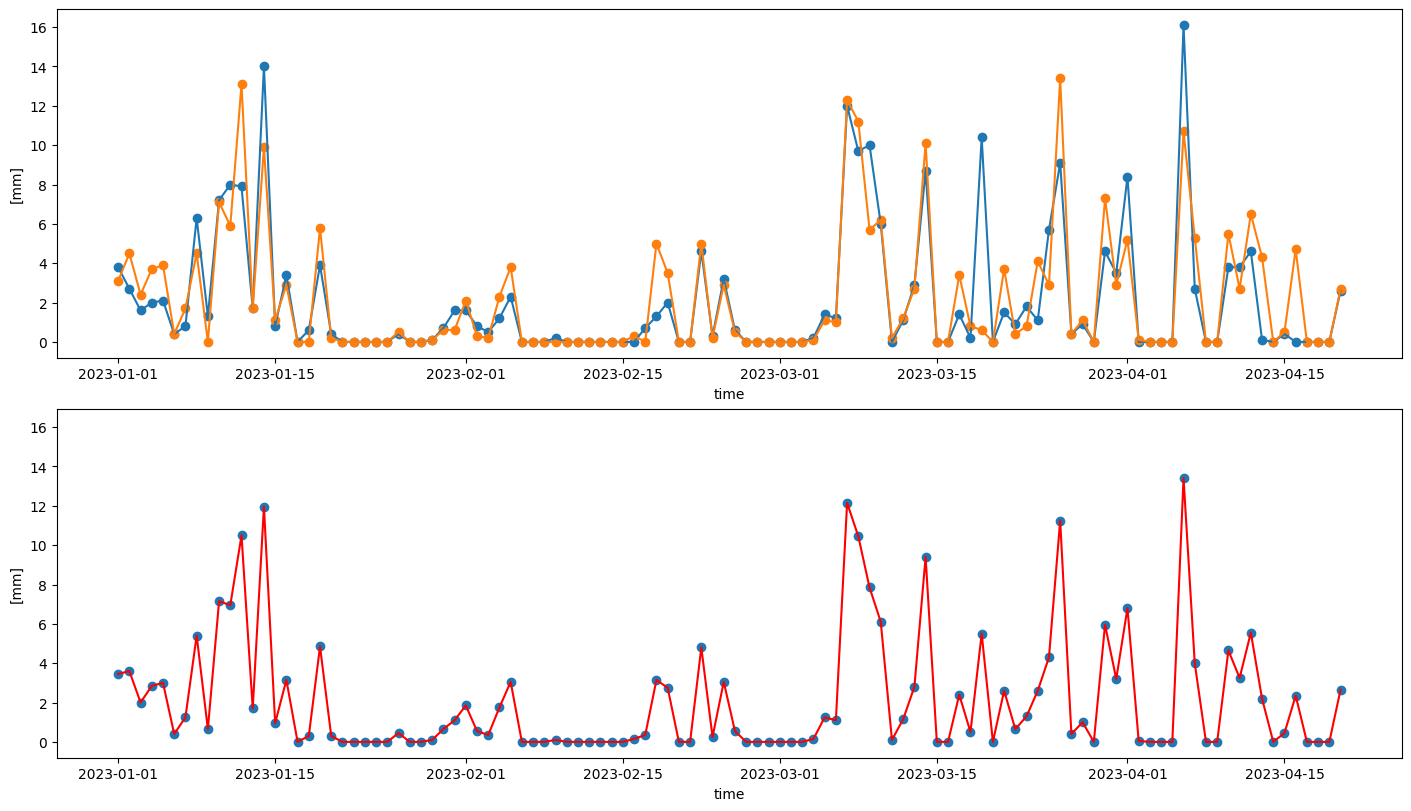

In [11]:
fig, (ax1, ax2) = plt.subplots(2, 1, constrained_layout=True, sharey=True, figsize=(14, 8))
ax1.scatter(data_stammheim.index, data_stammheim['prcp'])
ax1.plot(data_stammheim.index, data_stammheim['prcp'])
ax1.scatter(data_airport.index, data_airport['prcp'])
ax1.plot(data_airport.index, data_airport['prcp'])
# ax1.scatter(df_means.index, df_means['prcp'])
# ax1.plot(df_means.index, df_means['prcp'])
ax1.set_xlabel('time')
ax1.set_ylabel('[mm]')

ax2.scatter(df_means.index, df_means['prcp'])
ax2.plot(df_means.index, df_means['prcp'], color='r')
ax2.set_xlabel('time')
ax2.set_ylabel('[mm]')
plt.show()

# Daily Data 2022

In [12]:
start = datetime(2022, 1, 1)
end = datetime(2023, 1, 1)
print('Current date: {}'.format(end))
data_airport = Daily(station_airport, start, end)
data_airport = data_airport.fetch()
data_stammheim = Daily(station_stammheim, start, end)
data_stammheim = data_stammheim.fetch()
df_concat = pd.concat((data_airport, data_stammheim))
by_row_index = df_concat.groupby(df_concat.index)
df_means = by_row_index.mean()
df_means.head()

Current date: 2023-01-01 00:00:00


,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2022-01-01,12.50,9.65,14.90,0.30,0.0,178.5,12.20,29.5,1023.65,135.0
2022-01-02,11.15,9.00,13.85,10.30,0.0,180.0,15.95,56.2,1014.90,2.0
2022-01-03,9.65,7.95,11.40,11.60,0.0,234.5,18.25,50.8,1010.90,7.0
2022-01-04,6.75,3.20,8.15,13.35,0.0,227.0,8.15,31.0,998.40,0.0
2022-01-05,3.55,1.20,5.50,1.65,0.0,269.5,20.55,52.6,1006.20,0.0


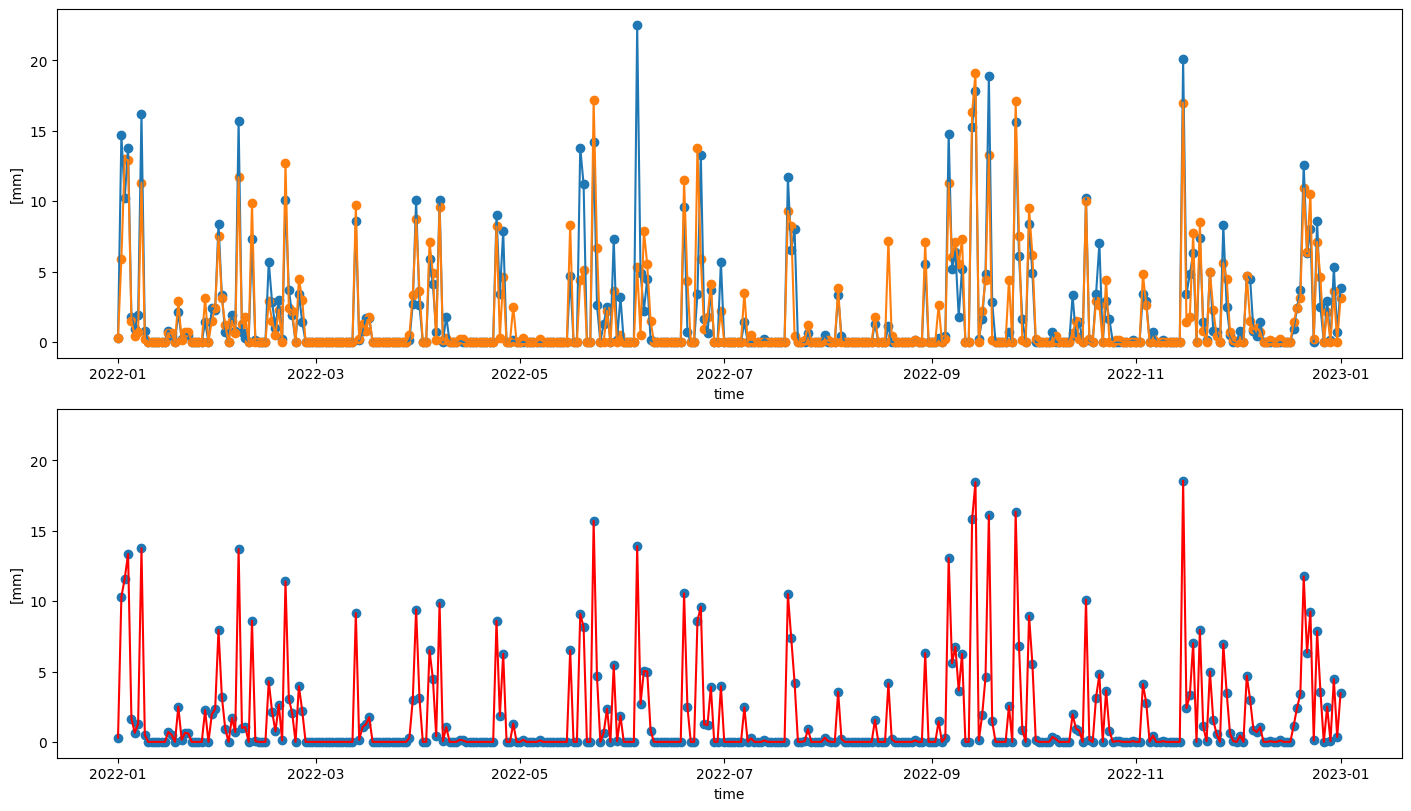

In [13]:
fig, (ax1, ax2) = plt.subplots(2, 1, constrained_layout=True, sharey=True, figsize=(14, 8))
ax1.scatter(data_stammheim.index, data_stammheim['prcp'])
ax1.plot(data_stammheim.index, data_stammheim['prcp'])
ax1.scatter(data_airport.index, data_airport['prcp'])
ax1.plot(data_airport.index, data_airport['prcp'])
# ax1.scatter(df_means.index, df_means['prcp'])
# ax1.plot(df_means.index, df_means['prcp'])
ax1.set_xlabel('time')
ax1.set_ylabel('[mm]')

ax2.scatter(df_means.index, df_means['prcp'])
ax2.plot(df_means.index, df_means['prcp'], color='r')
ax2.set_xlabel('time')
ax2.set_ylabel('[mm]')
plt.show()

# Daily Data August 2022

In [14]:
start = datetime(2022, 9, 1)
end = datetime(2022, 10, 1)
data_airport = Daily(station_airport, start, end)
data_airport = data_airport.fetch()
data_stammheim = Daily(station_stammheim, start, end)
data_stammheim = data_stammheim.fetch()
df_concat = pd.concat((data_airport, data_stammheim))
by_row_index = df_concat.groupby(df_concat.index)
df_means = by_row_index.mean()
df_means.head()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2022-09-01,20.30,12.2,26.35,0.00,NaN,108.5,10.85,37.8,1018.95,730.0
2022-09-02,20.90,15.9,26.50,0.00,NaN,112.0,15.00,43.2,1014.70,606.0
2022-09-03,19.10,15.4,25.95,1.45,NaN,123.5,12.50,34.6,1012.05,280.0
2022-09-04,20.65,14.0,27.70,0.00,NaN,140.5,7.35,19.1,1017.35,651.0
2022-09-05,22.75,15.2,30.80,0.30,NaN,118.0,8.30,25.2,1018.55,533.0


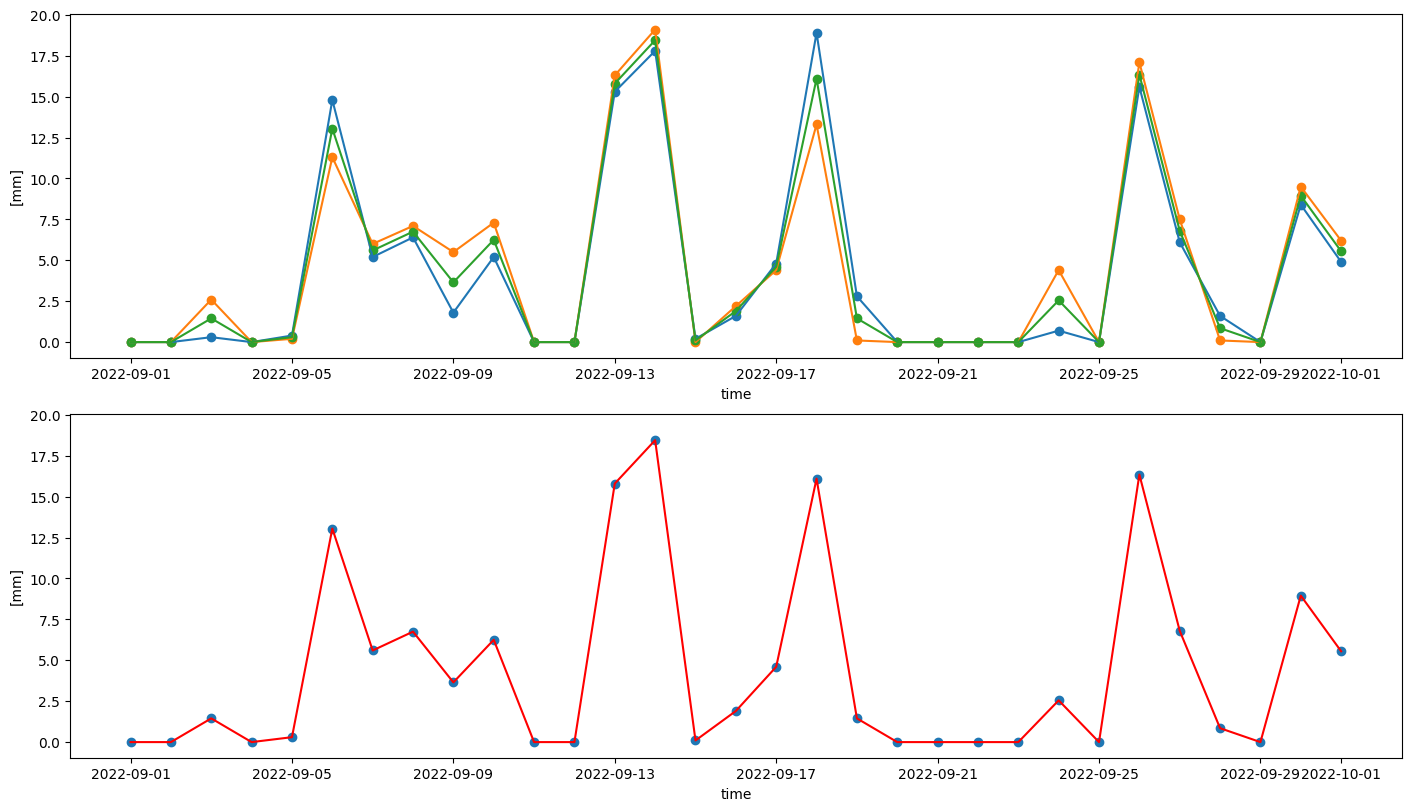

In [15]:
fig, (ax1, ax2) = plt.subplots(2, 1, constrained_layout=True, sharey=True, figsize=(14, 8))
ax1.scatter(data_stammheim.index, data_stammheim['prcp'])
ax1.plot(data_stammheim.index, data_stammheim['prcp'])
ax1.scatter(data_airport.index, data_airport['prcp'])
ax1.plot(data_airport.index, data_airport['prcp'])
ax1.scatter(df_means.index, df_means['prcp'])
ax1.plot(df_means.index, df_means['prcp'])
ax1.set_xlabel('time')
ax1.set_ylabel('[mm]')

ax2.scatter(df_means.index, df_means['prcp'])
ax2.plot(df_means.index, df_means['prcp'], color='r')
ax2.set_xlabel('time')
ax2.set_ylabel('[mm]')
plt.show()

# Daily Data December 2021 - February 2022

In [16]:
start = datetime(2021, 12, 15)
end = datetime(2022, 2, 21)
data_airport = Daily(station_airport, start, end)
data_airport = data_airport.fetch()
data_stammheim = Daily(station_stammheim, start, end)
data_stammheim = data_stammheim.fetch()
df_concat = pd.concat((data_airport, data_stammheim))
by_row_index = df_concat.groupby(df_concat.index)
df_means = by_row_index.mean()
df_means.head()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2021-12-15,8.75,7.85,10.00,0.05,0.0,195.0,6.00,16.6,1031.55,2.0
2021-12-16,8.65,6.95,9.80,0.00,0.0,208.5,4.50,14.8,1036.95,0.0
2021-12-17,7.55,1.95,9.05,0.05,0.0,66.5,4.25,14.8,1039.55,0.0
2021-12-18,4.40,1.45,6.05,0.35,0.0,230.5,4.80,16.6,1038.55,0.0
2021-12-19,5.95,5.60,6.50,0.15,0.0,293.5,11.80,29.5,1031.15,0.0


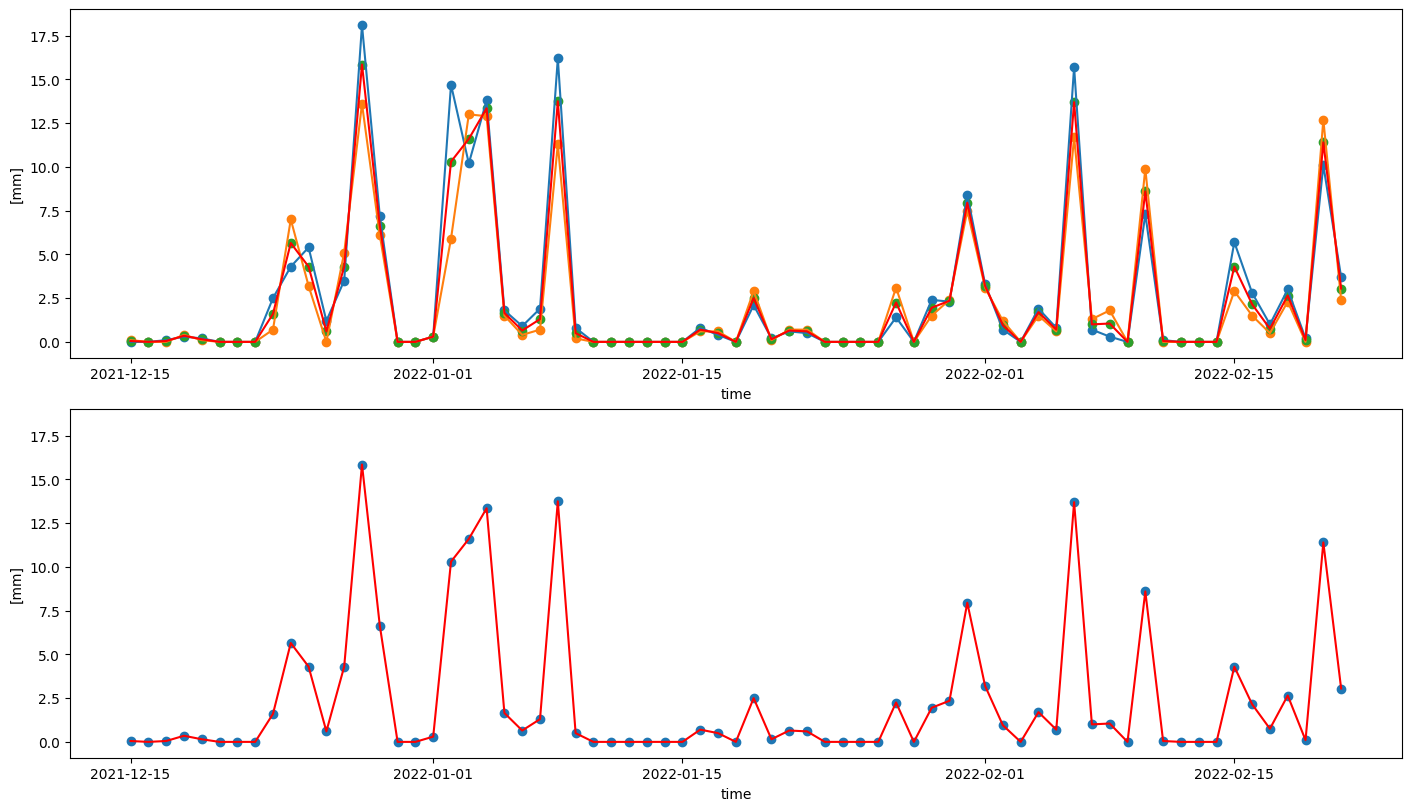

In [17]:
fig, (ax1, ax2) = plt.subplots(2, 1, constrained_layout=True, sharey=True, figsize=(14, 8))
ax1.scatter(data_stammheim.index, data_stammheim['prcp'])
ax1.plot(data_stammheim.index, data_stammheim['prcp'])
ax1.scatter(data_airport.index, data_airport['prcp'])
ax1.plot(data_airport.index, data_airport['prcp'])
ax1.scatter(df_means.index, df_means['prcp'])
ax1.plot(df_means.index, df_means['prcp'], color='r')
ax1.set_xlabel('time')
ax1.set_ylabel('[mm]')

ax2.scatter(df_means.index, df_means['prcp'])
ax2.plot(df_means.index, df_means['prcp'], color='r')
ax2.set_xlabel('time')
ax2.set_ylabel('[mm]')
plt.show()

# June - July 2021

In [18]:
start = datetime(2021, 6, 1)
end = datetime(2021, 7, 31)

In [19]:
data_airport = Daily(station_airport, start, end)
data_airport = data_airport.fetch()
data_stammheim = Daily(station_stammheim, start, end)
data_stammheim = data_stammheim.fetch()
df_concat = pd.concat((data_airport, data_stammheim))
by_row_index = df_concat.groupby(df_concat.index)
df_means = by_row_index.mean()
df_means.head()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2021-06-01,19.15,9.60,25.65,0.00,0.0,118.5,11.75,42.5,1017.10,915.0
2021-06-02,21.05,9.85,28.10,0.05,0.0,130.5,11.70,38.9,1014.95,859.0
2021-06-03,20.30,17.10,24.75,2.30,0.0,145.0,7.95,25.9,1019.05,181.0
2021-06-04,21.05,16.15,28.05,22.90,0.0,118.0,6.35,53.6,1019.75,405.0
2021-06-05,17.55,14.80,21.70,0.35,0.0,254.5,10.95,36.4,1019.80,5.0


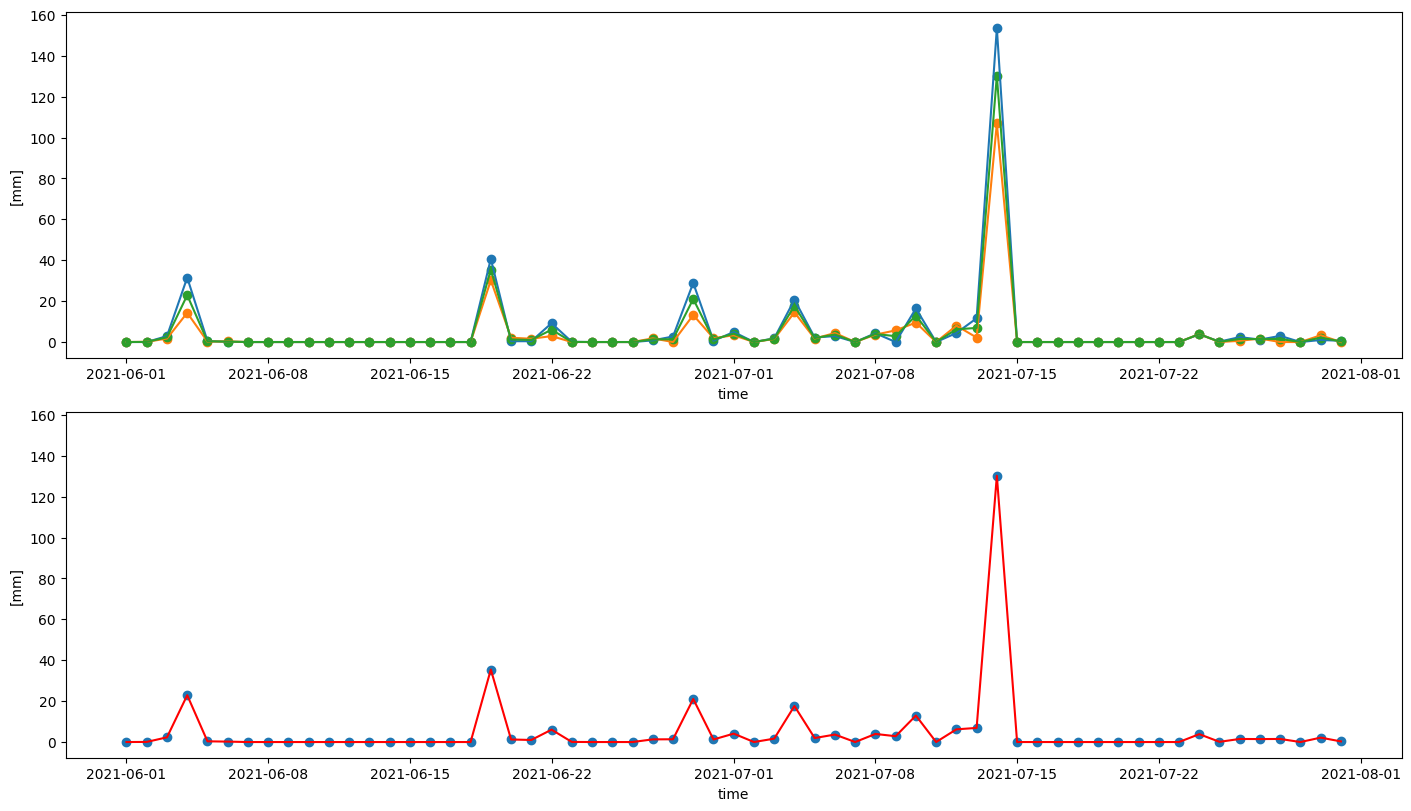

In [20]:
fig, (ax1, ax2) = plt.subplots(2, 1, constrained_layout=True, sharey=True, figsize=(14, 8))
ax1.scatter(data_stammheim.index, data_stammheim['prcp'])
ax1.plot(data_stammheim.index, data_stammheim['prcp'])
ax1.scatter(data_airport.index, data_airport['prcp'])
ax1.plot(data_airport.index, data_airport['prcp'])
ax1.scatter(df_means.index, df_means['prcp'])
ax1.plot(df_means.index, df_means['prcp'])
ax1.set_xlabel('time')
ax1.set_ylabel('[mm]')

ax2.scatter(df_means.index, df_means['prcp'])
ax2.plot(df_means.index, df_means['prcp'], color='r')
ax2.set_xlabel('time')
ax2.set_ylabel('[mm]')
plt.show()

# January 2021 - June 2021

In [21]:
start = datetime(2021, 1, 1)
end = datetime(2021, 7, 1)
data_airport = Daily(station_airport, start, end)
data_airport = data_airport.fetch()
data_stammheim = Daily(station_stammheim, start, end)
data_stammheim = data_stammheim.fetch()
df_concat = pd.concat((data_airport, data_stammheim))
by_row_index = df_concat.groupby(df_concat.index)
df_means = by_row_index.mean()
df_means.head()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2021-01-01,2.50,0.25,4.80,0.00,0.0,275.0,6.10,14.8,1008.20,45.0
2021-01-02,2.25,1.00,3.75,0.00,0.0,130.0,4.60,13.0,1013.65,0.0
2021-01-03,2.80,1.50,3.95,0.25,0.0,14.5,12.15,33.8,1013.70,0.0
2021-01-04,2.10,1.35,2.95,0.00,0.0,27.5,8.65,16.6,1014.90,0.0
2021-01-05,2.30,1.10,3.35,2.20,0.0,190.5,9.30,20.5,1015.35,0.0


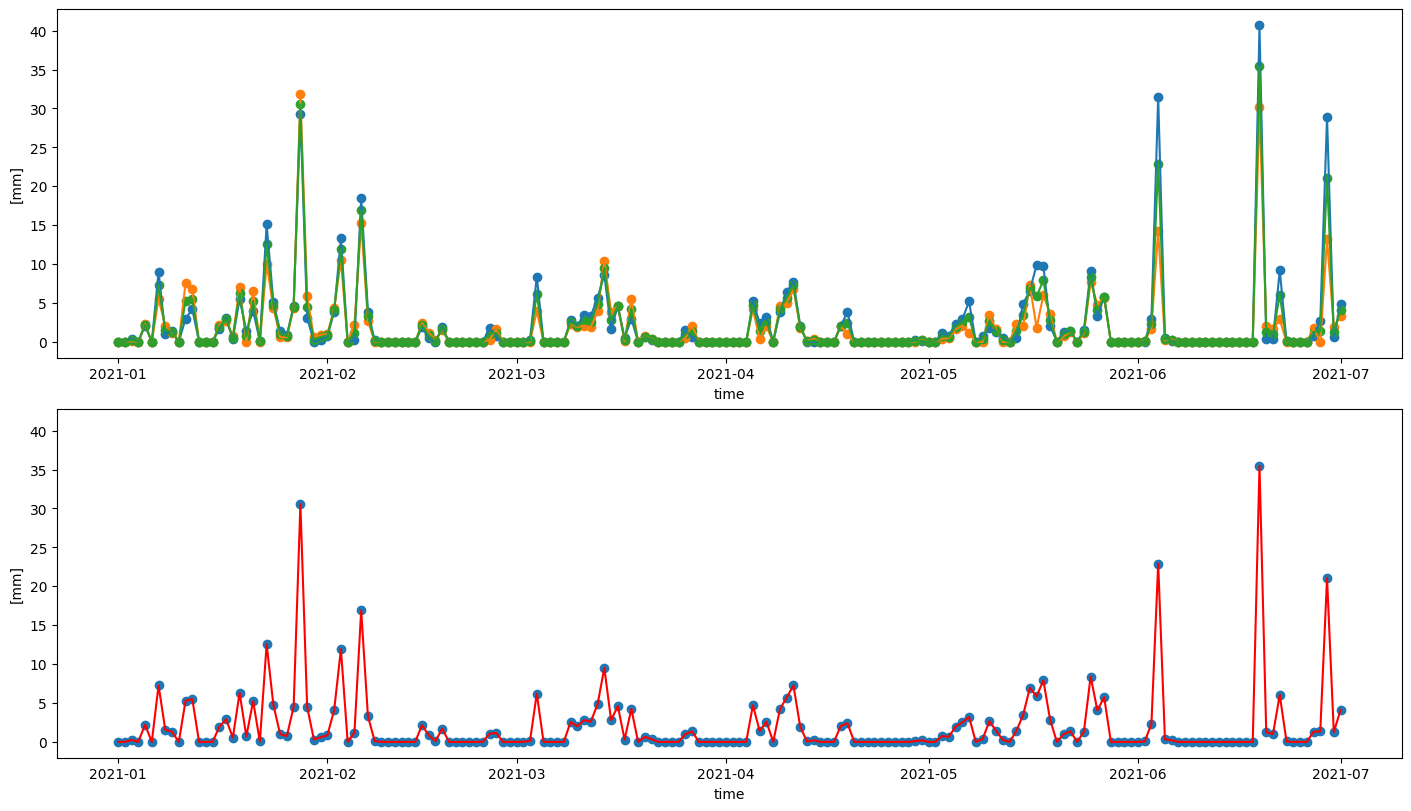

In [22]:
fig, (ax1, ax2) = plt.subplots(2, 1, constrained_layout=True, sharey=True, figsize=(14, 8))
ax1.scatter(data_stammheim.index, data_stammheim['prcp'])
ax1.plot(data_stammheim.index, data_stammheim['prcp'])
ax1.scatter(data_airport.index, data_airport['prcp'])
ax1.plot(data_airport.index, data_airport['prcp'])
ax1.scatter(df_means.index, df_means['prcp'])
ax1.plot(df_means.index, df_means['prcp'])
ax1.set_xlabel('time')
ax1.set_ylabel('[mm]')

ax2.scatter(df_means.index, df_means['prcp'])
ax2.plot(df_means.index, df_means['prcp'], color='r')
ax2.set_xlabel('time')
ax2.set_ylabel('[mm]')
plt.show()

# February 2020

In [117]:
start = datetime(2020, 1, 1)
end = datetime(2020, 2, 28)

In [118]:
data_airport = Daily(station_airport, start, end)
data_airport = data_airport.fetch()
data_stammheim = Daily(station_stammheim, start, end)
data_stammheim = data_stammheim.fetch()
df_concat = pd.concat((data_airport, data_stammheim))
by_row_index = df_concat.groupby(df_concat.index)
df_means = by_row_index.mean()
df_means.head()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2020-01-01,1.40,-0.50,3.65,0.00,0.0,113.0,14.8,33.5,1032.4,151.0
2020-01-02,2.20,-1.35,5.50,0.00,0.0,134.0,12.6,29.5,1026.7,48.0
2020-01-03,7.85,4.45,10.45,1.85,0.0,201.0,20.2,53.6,1020.1,0.0
2020-01-04,5.50,2.70,7.25,1.15,0.0,270.0,14.8,40.0,1029.7,0.0
2020-01-05,6.45,5.15,7.45,0.00,0.0,231.0,8.3,20.9,1034.2,0.0


<AxesSubplot:xlabel='time'>

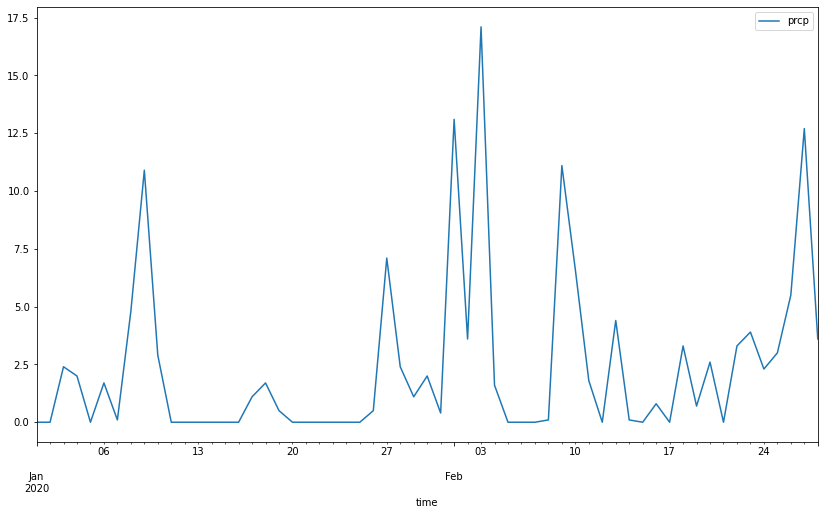

In [119]:
data_airport.plot(y=['prcp'], figsize=(14,8))

<AxesSubplot:xlabel='time'>

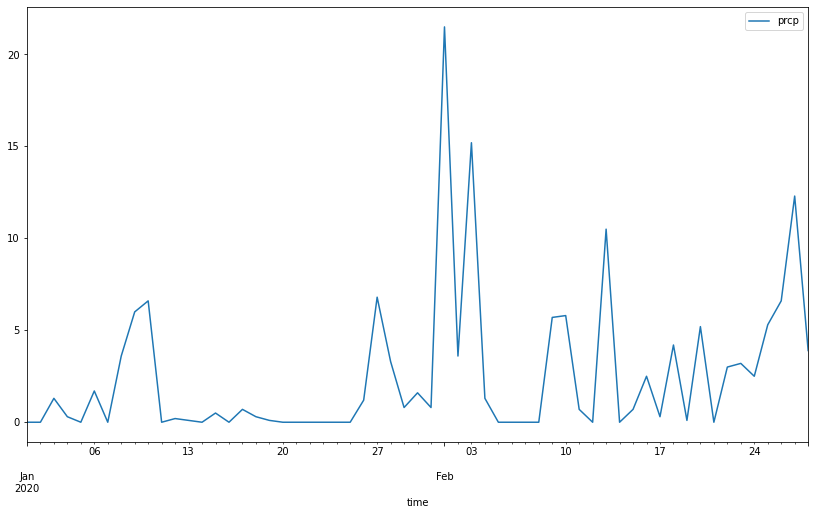

In [120]:
data_stammheim.plot(y=['prcp'], figsize=(14,8))

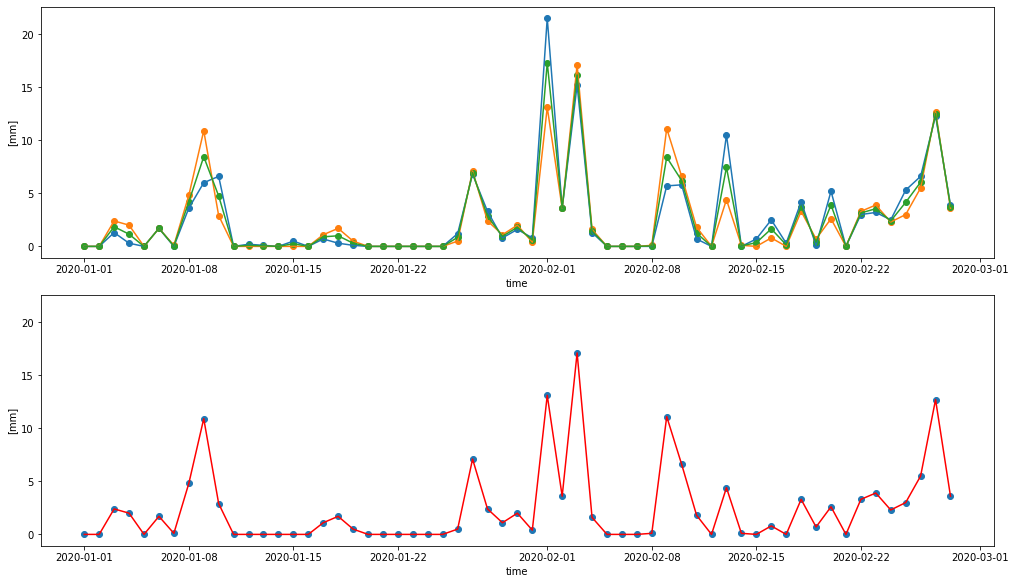

In [121]:
fig, (ax1, ax2) = plt.subplots(2, 1, constrained_layout=True, sharey=True, figsize=(14, 8))
ax1.scatter(data_stammheim.index, data_stammheim['prcp'])
ax1.plot(data_stammheim.index, data_stammheim['prcp'])
ax1.scatter(data_airport.index, data_airport['prcp'])
ax1.plot(data_airport.index, data_airport['prcp'])
ax1.scatter(df_means.index, df_means['prcp'])
ax1.plot(df_means.index, df_means['prcp'])
ax1.set_xlabel('time')
ax1.set_ylabel('[mm]')

ax2.scatter(data_airport.index, data_airport['prcp'])
ax2.plot(data_airport.index, data_airport['prcp'], color='r')
ax2.set_xlabel('time')
ax2.set_ylabel('[mm]')
plt.show()

# September - October 2018

In [40]:
start = datetime(2017, 6, 1)
end = datetime(2018, 10, 28)

In [41]:
data_airport = Daily(station_airport, start, end)
data_airport = data_airport.fetch()
data_stammheim = Daily(station_stammheim, start, end)
data_stammheim = data_stammheim.fetch()
df_concat = pd.concat((data_airport, data_stammheim))
by_row_index = df_concat.groupby(df_concat.index)
df_means = by_row_index.mean()
df_means.head()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2017-06-01,19.80,11.85,26.60,0.0,0.0,48.0,7.2,22.3,1020.0,726.0
2017-06-02,21.30,14.65,29.40,2.9,0.0,145.0,9.0,33.5,1015.2,432.0
2017-06-03,20.95,15.45,26.95,7.8,0.0,106.0,11.2,40.0,1011.5,372.0
2017-06-04,16.60,13.05,21.55,0.8,0.0,290.0,11.9,40.7,1014.3,216.0
2017-06-05,17.40,9.60,23.70,0.0,0.0,153.0,9.0,27.7,1012.1,534.0


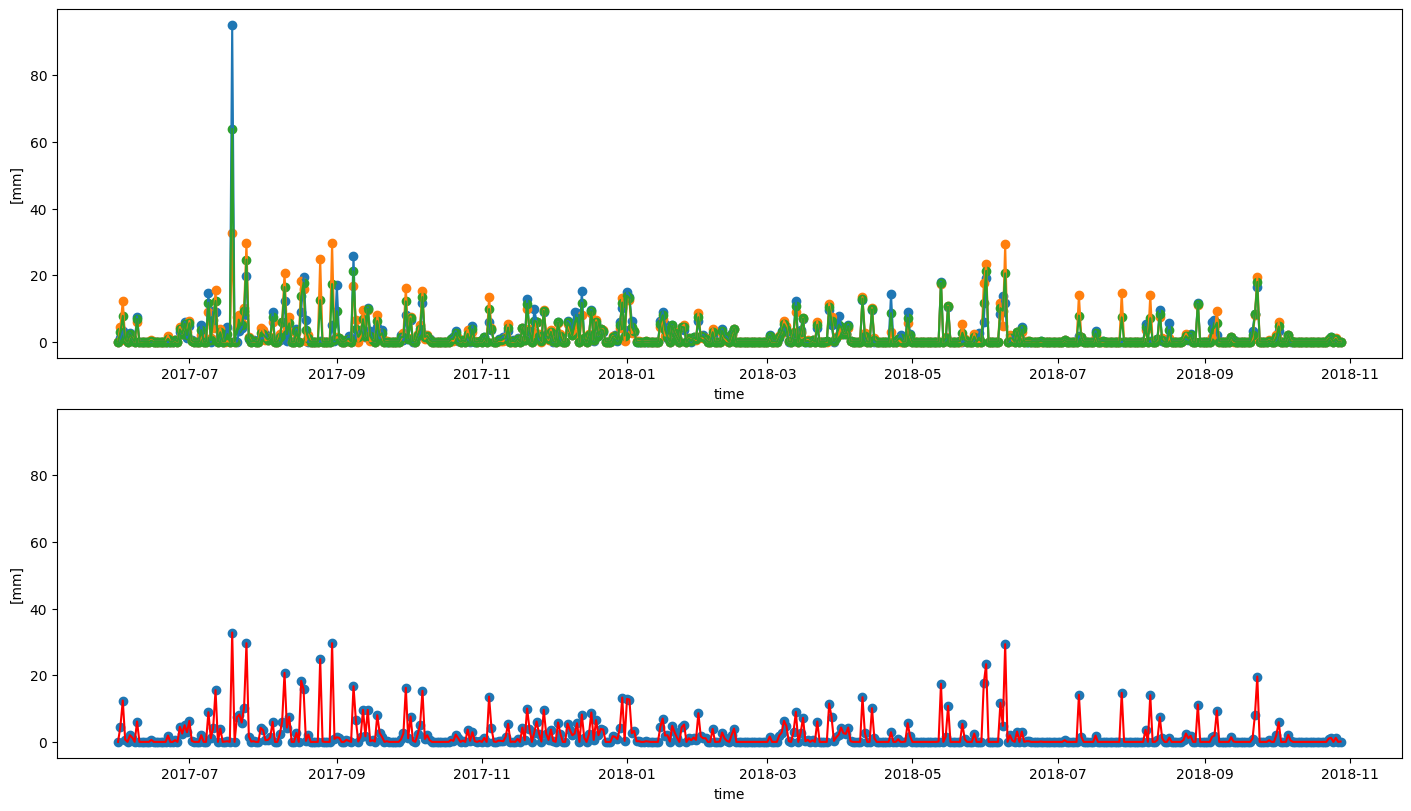

In [42]:
fig, (ax1, ax2) = plt.subplots(2, 1, constrained_layout=True, sharey=True, figsize=(14, 8))
ax1.scatter(data_stammheim.index, data_stammheim['prcp'])
ax1.plot(data_stammheim.index, data_stammheim['prcp'])
ax1.scatter(data_airport.index, data_airport['prcp'])
ax1.plot(data_airport.index, data_airport['prcp'])
ax1.scatter(df_means.index, df_means['prcp'])
ax1.plot(df_means.index, df_means['prcp'])
ax1.set_xlabel('time')
ax1.set_ylabel('[mm]')

ax2.scatter(data_airport.index, data_airport['prcp'])
ax2.plot(data_airport.index, data_airport['prcp'], color='r')
ax2.set_xlabel('time')
ax2.set_ylabel('[mm]')
plt.show()

In [24]:
start = datetime(2014, 1, 1)
end = datetime(2018, 10, 28)

In [25]:
data_airport = Daily(station_airport, start, end)
data_airport = data_airport.fetch()
data_stammheim = Daily(station_stammheim, start, end)
data_stammheim = data_stammheim.fetch()
df_concat = pd.concat((data_airport, data_stammheim))
by_row_index = df_concat.groupby(df_concat.index)
df_means = by_row_index.mean()
df_means.head()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2014-01-01,7.00,3.60,9.70,0.05,0.0,145.0,15.5,42.1,1007.8,276.0
2014-01-02,9.10,5.55,10.70,1.35,0.0,177.0,17.6,47.9,1001.3,30.0
2014-01-03,9.25,5.75,13.00,3.80,0.0,169.0,17.6,76.7,1005.0,90.0
2014-01-04,7.65,5.35,9.70,3.70,0.0,136.0,14.8,39.6,1002.8,0.0
2014-01-05,6.75,4.25,9.25,0.00,0.0,201.0,11.9,33.1,1005.7,294.0


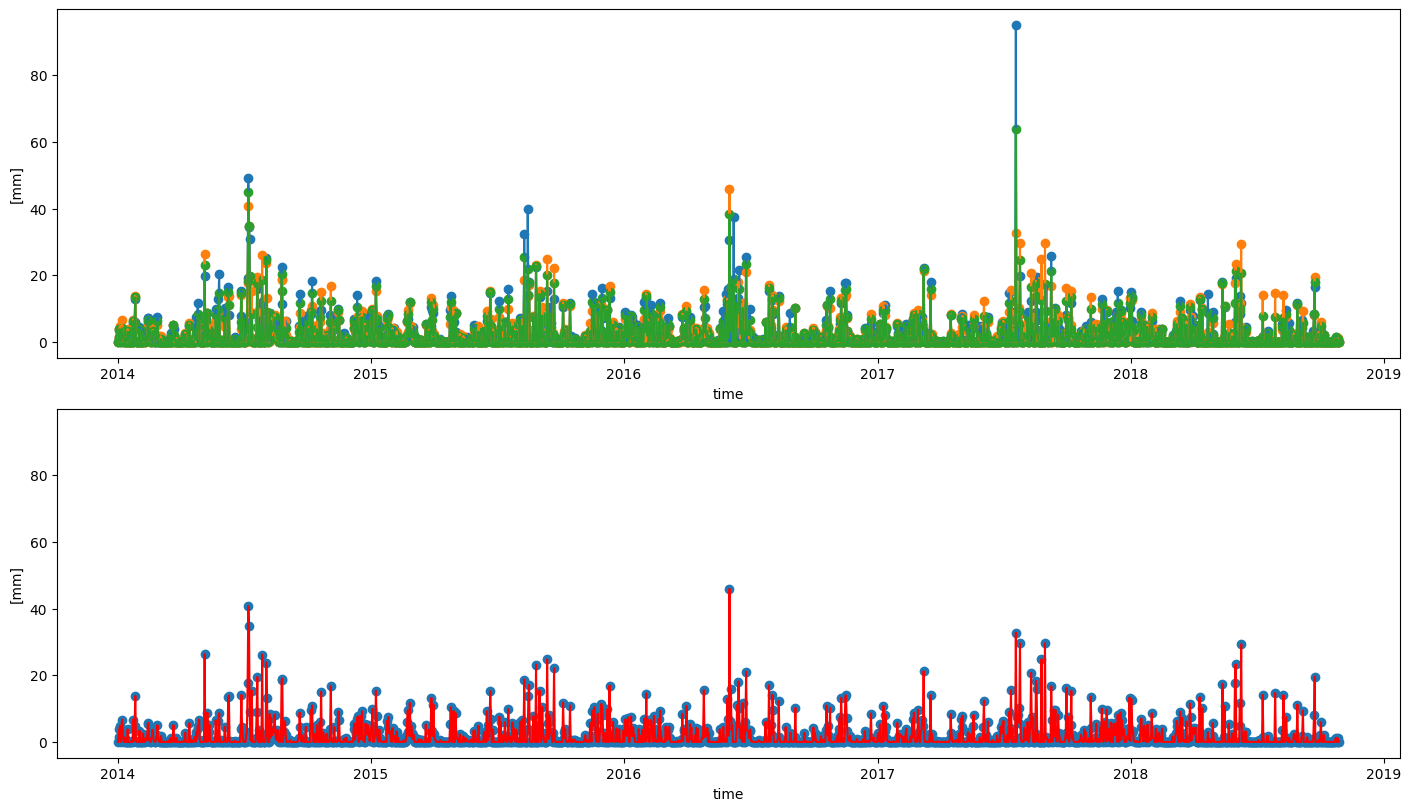

In [26]:
fig, (ax1, ax2) = plt.subplots(2, 1, constrained_layout=True, sharey=True, figsize=(14, 8))
ax1.scatter(data_stammheim.index, data_stammheim['prcp'])
ax1.plot(data_stammheim.index, data_stammheim['prcp'])
ax1.scatter(data_airport.index, data_airport['prcp'])
ax1.plot(data_airport.index, data_airport['prcp'])
ax1.scatter(df_means.index, df_means['prcp'])
ax1.plot(df_means.index, df_means['prcp'])
ax1.set_xlabel('time')
ax1.set_ylabel('[mm]')

ax2.scatter(data_airport.index, data_airport['prcp'])
ax2.plot(data_airport.index, data_airport['prcp'], color='r')
ax2.set_xlabel('time')
ax2.set_ylabel('[mm]')
plt.show()